# Lab 2: Part A: Some Deep Learning Basics from Scratch


In [43]:
## Basic libraries needed:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some PyTorch stuff:
import torch
import torch.nn as nn


## Entropy/Cross-Entropy Calculations

Recall that for some discrete probability distribution $p(x)$, the *entropy* of the distribution is defined as:

$$
H(p) = -\sum_{x_i} p(x_i) \log{p(x_i)},
$$
where we sum over all possible values $x_i$. Note we can use either base 2 or base $e$ for the logarithm without a meaningful change in the notion, though base 2 is a natural choice when thinking of entropy in terms of bits.

The entropy of a distribution can be considered a measure of how compressible a binary string representing outcomes drawn from that distribution is. That is, $H(p)$ represents the average length of a string of encoded outcomes, when the encoding is optimized for the particular distribution.

For example, a string of outcomes drawn from tossing a fair die is not very compressible, as no outcome is more likely than any other, and the distribution has a relatively high entropy. A distribution representing a die weighted to come up $6$ nearly all the time will have a lower entropy.

The *cross-entropy* is a measure of the similarity between two distributions. We can define it as:

$$
H(p, q) = -\sum_{x_i} p(x_i) \log{q(x_i)},
$$

The cross-entropy represents the number of bits needed to encode outcomes drawn from distribution $p$ (true distribution), when the encoding scheme is optimized for $q$ (the estimated distribution).

- Your task here is to generate a "true" distribution, and then compare the similarity of this true distribution to a family of "estimated" distributions using the cross-entropy metric.

### Generate a family of Discretized Beta Distributions:

The following snippet of code generates a "discretized" beta distribution, with parameters $a = 10$ and $b = 10$:

  Obtaining dependency information for jupyter from https://files.pythonhosted.org/packages/38/64/285f20a31679bf547b75602702f7800e74dbabae36ef324f716c02804753/jupyter-1.1.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/ea/c2/5ecadc5fcccefaece775feadcd795060adf5c3b29a883bff0e678cfe89af/scipy-1.14.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 463.7 kB/s eta 0:00:00
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/94/7a/4c00332a3ca79702bbc86228afd0e84e6f91b47222ec8cdf00677dd16481/numpy-2.1.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Rbrig\\AppData\\Local\\Temp\\pip-uninstall-21aacm4x\\core\\_multiarray_tests.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



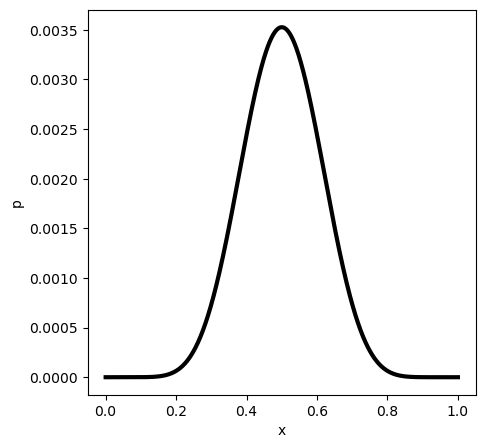

In [42]:
##!pip install --upgrade jupyter scipy numpy
from scipy.stats import beta

#a and b for the "true" beta distribution
a = 10; b = 10

#Define x over 1,000 evenly spaced points
x = np.linspace(0.0001, .9999, 1000)

#Normalize p s.t. it sums to 1, i.e., discretize
p = beta.pdf(x, a, b)
p /= np.sum(p)

#Plot result:
fig, ax1 = plt.subplots(1, 1, figsize=(5,5))#, dpi=300)
ax1.plot(x, p, 'k-', lw=3, alpha=1, label='beta pdf');
ax1.set_xlabel('x')
ax1.set_ylabel('p');

##kernel was dying every time I ran this cell, pip install fixed

#### Entropy for family of discretized beta distributions

- Generate a family of 10 discretized beta distributions where $a = b$, and $a$ ranges from $1$ to $100$ over an evenly spaced *logarithmic* space. Calculate the entropy for each.

- Plot the distributions, and the corresponding entropy, similar to the following figure:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Step 1: Generate the true beta distribution
a_true = 10
b_true = 10
x = np.linspace(0.0001, 0.9999, 1000)
p_true = beta.pdf(x, a_true, b_true)
p_true /= np.sum(p_true)  # Normalize

In [2]:
# Step 2: Generate a family of estimated beta distributions
a_values = np.logspace(0, 2, 10)  # a = b ranges from 1 to 100
entropies = []


In [3]:
# Prepare a plot for the distributions
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

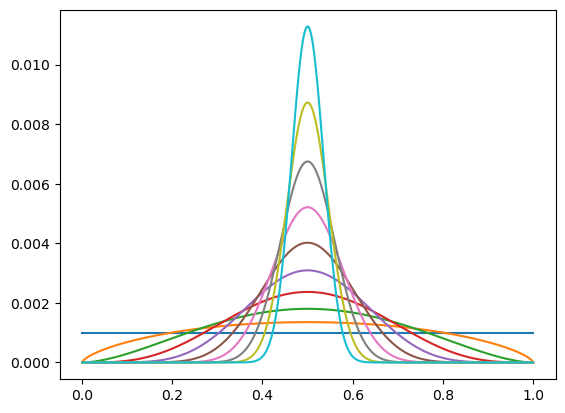

In [4]:
for a in a_values:
    # Generate the estimated beta distribution
    p_estimated = beta.pdf(x, a, a)
    p_estimated /= np.sum(p_estimated)  # Normalize

    # Calculate entropy
    entropy = -np.sum(p_estimated * np.log(p_estimated + 1e-10))  # avoid log(0)
    entropies.append(entropy)

    # Plot the estimated distribution
    plt.plot(x, p_estimated, label=f'a = {a:.2f}')


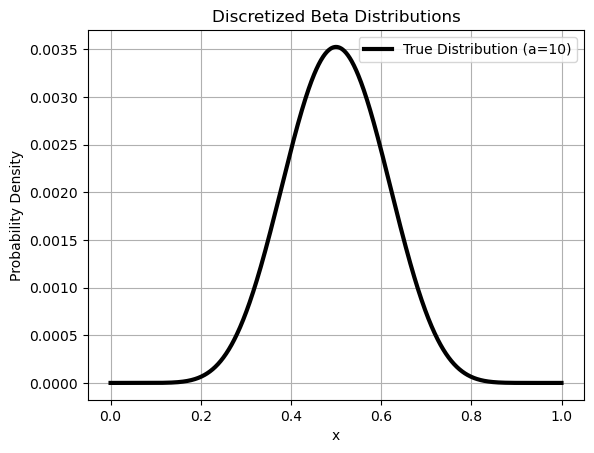

In [5]:
# Step 3: Plot the true distribution
plt.plot(x, p_true, 'k-', lw=3, label='True Distribution (a=10)')
plt.title('Discretized Beta Distributions')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

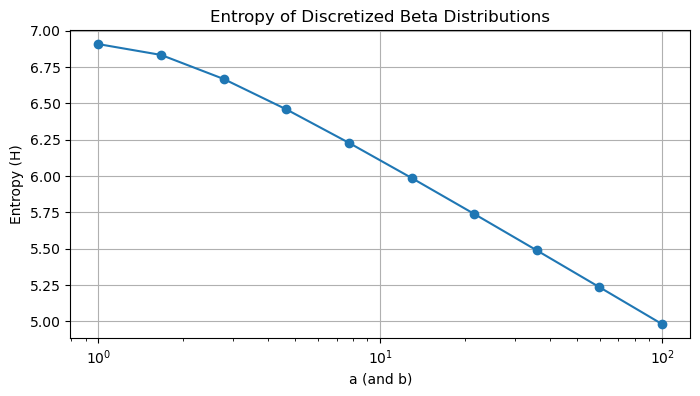

In [6]:
# Step 4: Plot Entropy
plt.figure(figsize=(8, 4))
plt.plot(a_values, entropies, marker='o')
plt.xscale('log')
plt.title('Entropy of Discretized Beta Distributions')
plt.xlabel('a (and b)')
plt.ylabel('Entropy (H)')
plt.grid()
plt.show()

#### Cross-Entropy for a family of discretized beta distributions

- Now, generate a family of "estimated" discrete beta distributions, with $b = 10$, and $a$ ranging from $2$ to $20$. Supposing the true distribution is given by $a = b = 10$ (as above), calculate the cross-entropy for each estimated distribution.

- Plot the true distribution along with the various estimates, as well as the resulting cross-entropy, as below:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

##beta distribution
a_true = 10
b_true = 10
x = np.linspace(0.0001, 0.9999, 1000)
p_true = beta.pdf(x, a_true, b_true)
p_true /= np.sum(p_true)  # Normalize

In [8]:
##rnages for a
a_values = np.linspace(2, 20, 10)
cross_entropies = []

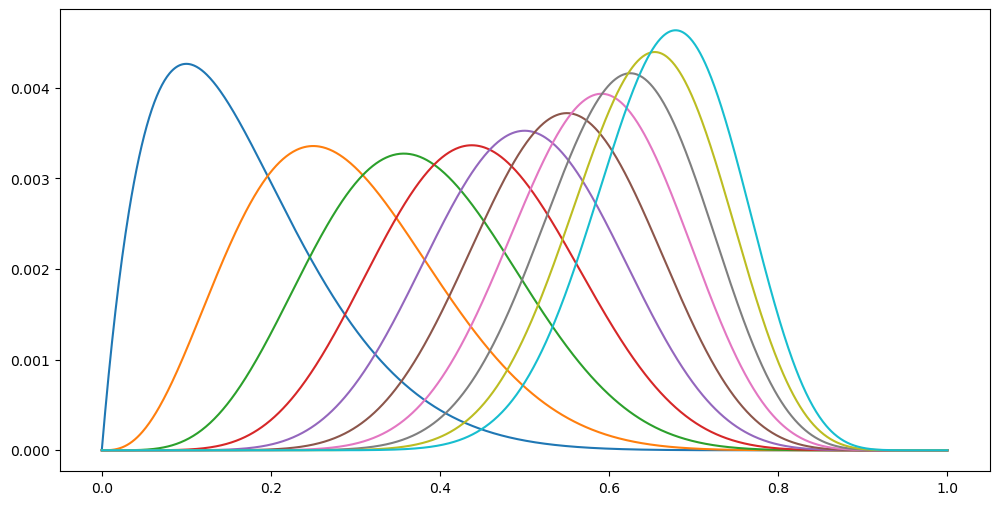

In [9]:
##distributions plot
plt.figure(figsize=(12, 6))

for a in a_values:
    p_estimated = beta.pdf(x, a, b_true)
    p_estimated /= np.sum(p_estimated)

    ##cross entropy
    cross_entropy = -np.sum(p_true * np.log(p_estimated + 1e-10))
    cross_entropies.append(cross_entropy)

    ##estimated distribution
    plt.plot(x, p_estimated, label=f'a = {a:.2f}')

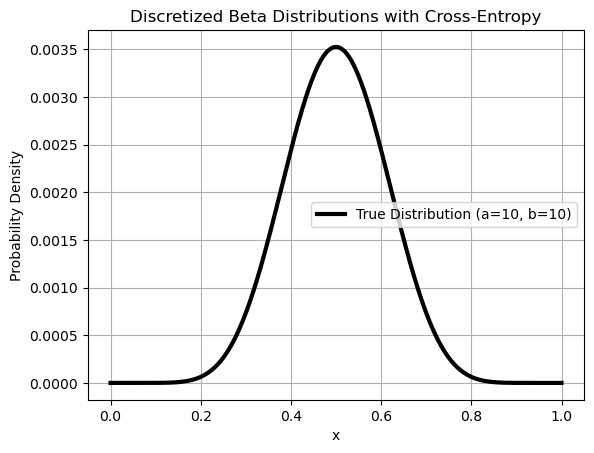

In [10]:
##true distribution
plt.plot(x, p_true, 'k-', lw=3, label='True Distribution (a=10, b=10)')
plt.title('Discretized Beta Distributions with Cross-Entropy')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

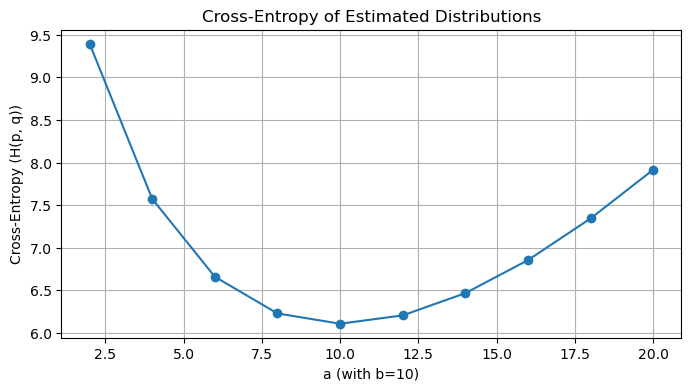

In [11]:
##plotting cross entropy
plt.figure(figsize=(8, 4))
plt.plot(a_values, cross_entropies, marker='o')
plt.title('Cross-Entropy of Estimated Distributions')
plt.xlabel('a (with b=10)')
plt.ylabel('Cross-Entropy (H(p, q))')
plt.grid()
plt.show()

## Linear Regression/Gradient Descent from Scratch

**The goal here is for you to implement a version of gradient descent for simple linear regression yourself. Your methods need not be fancy, just functional.**

### Setup:

First consider the minimal linear regression

$$
\hat{y} = b + w_1 x_1,
$$

where $x_1$ is our only input feature, $w_1$ is the weight, and $b$ is the bias. To simplify our mathematical expressions, we can rewrite this as

$$
\hat{y} = \theta_0 x_0 + \theta_1 x_1
$$

where $x_0 = 1$, $\theta_0 = b$, and $\theta_1 = w_1$.

Let's make our error (or cost) function the mean square error (MSE):

$$
E = \frac{1}{n} \sum_{i=1}^n \left( \hat{y}^{(i)} - y^{(i)} \right)^2,
$$

or

$$
E = \frac{1}{n} \sum_{i=1}^n \left( \theta_0 + \theta_1 x_1^{(i)} - y^{(i)} \right)^2,
$$
where $n$ is the number of observations in the training dataset.

We need our gradient vector to run the gradient descend method. So, taking partial derivatives, we get

$$
\frac{\partial E}{\partial \theta_0} = \frac{2}{n} \sum_{i=1}^n \left( \theta_0 + \theta_1 x_1^{(i)} - y^{(i)} \right),
$$

$$
\frac{\partial E}{\partial \theta_1} = \frac{2}{n} \sum_{i=1}^n \left( \theta_0 + \theta_1 x_1^{(i)} - y^{(i)} \right) x_1^{(i)},
$$

We can re-write these as

$$
\frac{\partial E}{\partial \theta_0} = \frac{2}{n} \sum_{i=1}^n \left( \hat{y}^{(i)} - y^{(i)} \right),
$$

$$
\frac{\partial E}{\partial \theta_1} = \frac{2}{n} \sum_{i=1}^n \left( \hat{y}^{(i)} - y^{(i)} \right) x_1^{(i)},
$$

These expressions give us the change in the loss function with respect to either model parameter. To run gradient descent and iteratively update our estimates for $\theta_0$ and $\theta_1$, we simply use the following rule:

$$
\theta_{j}^{(\text{next})} = \theta_{j} - \eta \frac{\partial E (\theta_j)}{\partial \theta_j},
$$
where $\eta$ is our learning rate.


### Synthetic Data

Run the following cell to generate input ($x$) and output ($y$) data:

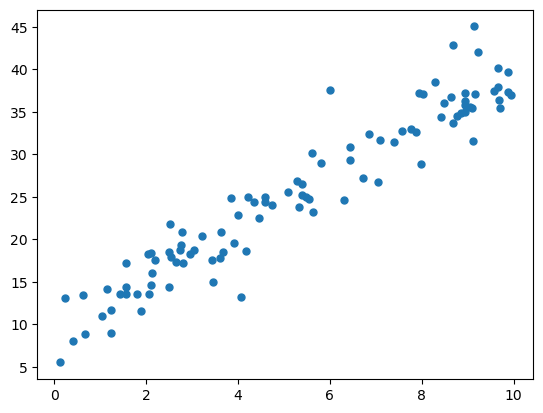

In [12]:
N = 100

#Random points between 0 and 10, sorted:
x = np.random.uniform(0, 10, N)
x.sort()

#Linear equation:
y = 3*x + 10 + np.random.normal(loc=0, scale=3, size=N)

#Plot our data:
plt.plot(x, y, 'o', markersize=5);

### Please implement the following:

Train a regression model on the given $x$ and $y$ in two ways:

1. (Full) batch gradient descent for linear regression with a single feature: Run the training loop for 100 iterations.
2. Stochastic gradient descent for linear regression with a single feature: Each training loop, sample a single observation. Run 1000 training loops.

- In either case, use a fixed learning rate of $\eta = .01$, and use an initial guess of $\theta_0 = \theta_1 = 1$.

- Plot the evolution of the weight and bias, as below. Also, plot your model predictions against the training data, as also shown below:

Note that your stochastic gradient plots will vary slightly due to random chance.

**For this task, do not use any Scikit-Learn estimators or PyTorch functions!**

In [13]:
# Generate synthetic data
N = 100
x = np.random.uniform(0, 10, N)
x.sort()
y = 3 * x + 10 + np.random.normal(loc=0, scale=3, size=N)

# Add x0 = 1 for bias term
X = np.c_[np.ones(N), x]  # Shape (N, 2), first column is bias

# Parameters
learning_rate = 0.01
theta = np.array([1.0, 1.0])  # Initial guess for [theta_0, theta_1]

In [14]:
# Function to compute Mean Squared Error
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta  # Matrix multiplication
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

In [15]:
# Batch Gradient Descent
def batch_gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    theta_history = [theta.copy()]
    
    for _ in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        gradients = (1 / m) * (X.T @ errors)  # Gradient calculation
        theta -= learning_rate * gradients  # Update the parameters
        cost_history.append(compute_cost(X, y, theta))
        theta_history.append(theta.copy())
        
    return theta, cost_history, theta_history


In [16]:
# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    theta_history = [theta.copy()]
    
    for _ in range(iterations):
        for i in range(m):
            random_index = np.random.randint(0, m)  # Random index for SGD
            xi = X[random_index:random_index + 1]  # Single sample
            yi = y[random_index:random_index + 1]
            predictions = xi @ theta
            error = predictions - yi
            gradients = xi.T * error  # Gradient for single sample
            theta -= learning_rate * gradients.flatten()  # Update the parameters
            cost_history.append(compute_cost(X, y, theta))
            theta_history.append(theta.copy())
            
    return theta, cost_history, theta_history

In [17]:
# Train using batch gradient descent
theta_bgd, cost_history_bgd, theta_history_bgd = batch_gradient_descent(X, y, theta.copy(), learning_rate, 100)

# Train using stochastic gradient descent
theta_sgd, cost_history_sgd, theta_history_sgd = stochastic_gradient_descent(X, y, theta.copy(), learning_rate, 1000)

# Plotting the results
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

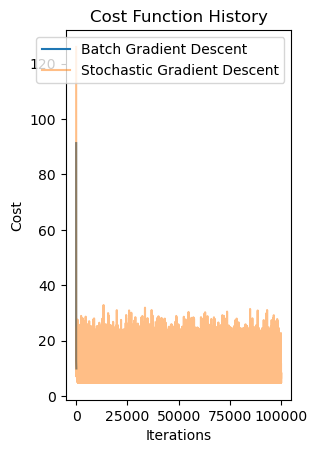

In [18]:
# Plot cost history for batch gradient descent
plt.subplot(1, 2, 1)
plt.plot(cost_history_bgd, label='Batch Gradient Descent')
plt.plot(cost_history_sgd, label='Stochastic Gradient Descent', alpha=0.5)
plt.title('Cost Function History')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()

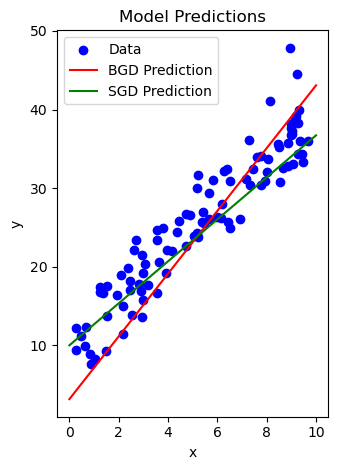

In [19]:
# Plot predictions vs actual data
plt.subplot(1, 2, 2)
plt.scatter(x, y, color='blue', label='Data')
x_range = np.linspace(0, 10, 100)
y_pred_bgd = theta_bgd[0] + theta_bgd[1] * x_range
y_pred_sgd = theta_sgd[0] + theta_sgd[1] * x_range
plt.plot(x_range, y_pred_bgd, color='red', label='BGD Prediction')
plt.plot(x_range, y_pred_sgd, color='green', label='SGD Prediction')
plt.title('Model Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

### Add Momentum + Nesterov Trick

Recall the basic momentum algorithm, in vector form:

$$
\mathbf{m} \leftarrow \beta \mathbf{m} - \eta \nabla E(\theta),
$$
$$
\theta \leftarrow \theta + \mathbf{m},
$$
where $\mathbf{m}$ is the momentum vector, and $\theta$ is our vector of model parameters.

Also recall that we can speed up the momentum algorithm by adding the Nesterov Trick: Update the momentum using not the gradient where you are, but where you will be! Mathematically:
$$
\mathbf{m} \leftarrow \beta \mathbf{m} - \eta \nabla E(\theta + \beta \mathbf{m}),
$$
$$
\theta \leftarrow \theta + \mathbf{m},
$$

**Extend your work above to implement momentum with the Nesterov Trick**

- Run (full) batch gradient descent with momentum for the same regression problem, with and without the Nesterov trick.

- You should observe that some momentum (e.g., $\beta = 0.9$) results in much faster convergence to the minimum. Using the Nesterov trick smoothes and may hasten this convergence.

- Plot the evolution of the weight and bias over 1,000 iterations of the method using a fixed learning rate of $\eta = .01$, an initial guess of $\theta_0 = \theta_1 = 1$, and an *exaggerated* momentum of $\beta = 0.99$. Plot this evolution with and without the Nesterov trick. Your results should resemble those below:

**For this task, do not use any Scikit-Learn estimators or PyTorch functions!**

In [20]:
##data
N = 100
x = np.random.uniform(0, 10, N)
x.sort()
y = 3 * x + 10 + np.random.normal(loc=0, scale=3, size=N)

X = np.c_[np.ones(N), x]

In [21]:
##parameters
learning_rate = 0.01
beta = 0.99
theta_initial = np.array([1.0, 1.0])

In [22]:
##MSE
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

In [23]:
##gradient descent/momentum
def batch_gradient_descent_momentum(X, y, theta, learning_rate, iterations, beta, nesterov=False):
    m = len(y)
    cost_history = []
    theta_history = [theta.copy()]
    momentum = np.zeros_like(theta)

    for _ in range(iterations):
        if nesterov:
            theta_nesterov = theta + beta * momentum
            predictions = X @ theta_nesterov
        else:
            predictions = X @ theta
        
        errors = predictions - y
        gradients = (1 / m) * (X.T @ errors)
        momentum = beta * momentum - learning_rate * gradients
        theta += momentum
        
        cost_history.append(compute_cost(X, y, theta))
        theta_history.append(theta.copy())
        
    return theta, cost_history, theta_history

In [24]:
##train batch gradient descent/momentum w/o Nesterov
theta_momentum, cost_history_momentum, theta_history_momentum = batch_gradient_descent_momentum(
    X, y, theta_initial.copy(), learning_rate, 1000, beta, nesterov=False
)


In [25]:
##train batch gradient descent/momentum with Nesterov
theta_nesterov, cost_history_nesterov, theta_history_nesterov = batch_gradient_descent_momentum(
    X, y, theta_initial.copy(), learning_rate, 1000, beta, nesterov=True
)

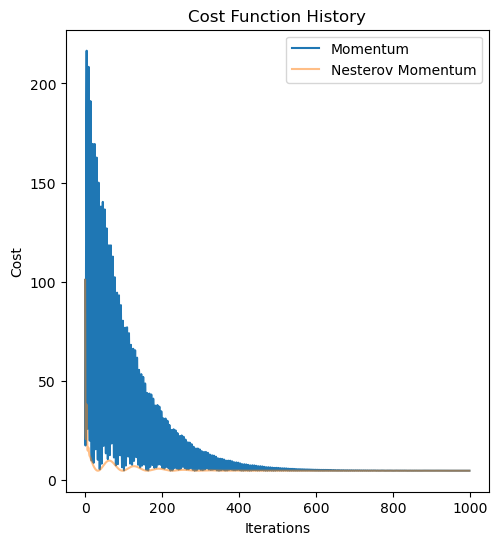

In [26]:
##plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cost_history_momentum, label='Momentum')
plt.plot(cost_history_nesterov, label='Nesterov Momentum', alpha=0.5)
plt.title('Cost Function History')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()


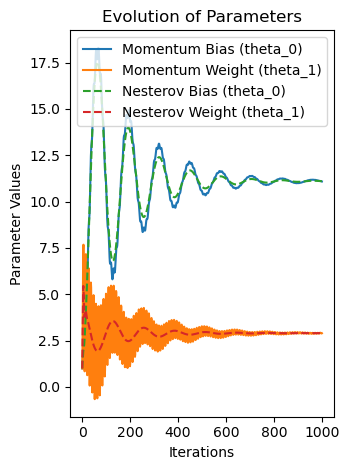

In [27]:
##plot weight/bias
theta_history_momentum = np.array(theta_history_momentum)
theta_history_nesterov = np.array(theta_history_nesterov)

plt.subplot(1, 2, 2)
plt.plot(theta_history_momentum[:, 0], label='Momentum Bias (theta_0)')
plt.plot(theta_history_momentum[:, 1], label='Momentum Weight (theta_1)')
plt.plot(theta_history_nesterov[:, 0], label='Nesterov Bias (theta_0)', linestyle='--')
plt.plot(theta_history_nesterov[:, 1], label='Nesterov Weight (theta_1)', linestyle='--')
plt.title('Evolution of Parameters')
plt.xlabel('Iterations')
plt.ylabel('Parameter Values')
plt.legend()

plt.tight_layout()
plt.show()

## Reverse Mode AutoDiff

Let's practice defining our automatic differentiation variables and sketching the computational graphs result for several multivariate functions, and then calculate the derivatives at given points.

Follow the convention for naming variables:

- $v_{i-n}$, $i = 1,...,m$ for input variables (i.e., $v_0$ for a single input; $v_0$ and $v_{-1}$ for two inputs)
- $v_{i}$, $i = 1, ..., k$ for $k$ intermediate variables
- $y = v_k$ will be the only output variable

**You may perform these calculations by hand and include either a picture/scanned version, or turn in in-person.**


#### 1. Function 1:

$$
y = f(x_1, x_2) = x_1 + (x_1 + x_2)^2
$$

Define all variables (each should be defined in terms of no more than one differentiable elementary function), and draw the computational graph.

- For $(x_1, x_2) = (3,5)$, perform the forward evaluation trace, and report the values for all $v_i$. 

- Determine the values of $dy/dx_1$ and $dy/dx_2$ at $(x_1, x_2) = (3,5)$, using reverse mode autodifferentiation. Determine the value of all adjoints $\bar{v}_i = \frac{dy}{dv_i}$, as part of your answer.

*Note: You should have five variables, $v_{-1},v_0,v_1,v_2,v_3$*, and corresponding adjoints.

*Show all your work*.


#### 2. Function 2:

$$
y = f(x_1, x_2) = \sin(x_1) \exp{(x_1 + x_2)}
$$

Similarly, define all variables and draw the graph.

- For $(x_1, x_2) = (1,2)$, perform the forward evaluation trace, and report the values for all $v_i$. 

- Determine the values of $dy/dx_1$ and $dy/dx_2$ at $(x_1, x_2) = (1,2)$, using reverse mode autodifferentiation. Determine the value of all adjoints $\bar{v}_i = \frac{dy}{dv_i}$, as part of your answer.

*Note: You should have six variables, $v_{-1},v_0,v_1,v_2,v_3,v_4$*, and corresponding adjoints.

*Show all your work*.


#### 3. Function 3:

$$
y = f(x) = x^2 + \frac{\sin(x)}{x}
$$

Similarly, define all variables and draw the graph.

- For $x = 3$, perform the forward evaluation trace, and report the values for all $v_i$.

- Determine the value of $dy/dx$ at $x = 3$, using reverse mode autodifferentiation. Determine the value of all adjoints $\bar{v}_i = \frac{dy}{dv_i}$, as part of your answer.

*Note: You should have five variables, $v_0,...v_4$*, and corresponding adjoints.

*Show all your work*.

### Confirm Results Using PyTorch:

- Confirm all results above using PyTorch tensors and the `torch.Tensor.backward` method.

- For each function, define your `v_i` variables as PyTorch tensors with `requires_grad = True`. Perform reverse mode autodifferentation and report all adjoints $\bar{v}_i = \frac{dy}{dv_i}$ as calculated by PyTorch.

Note that you can use, for example, `v1.retain_grad()`, to have a non-leaf tensor's `grad` populated during `backward()`.

In [28]:
import torch

##input variables
x1 = torch.tensor(1.0, requires_grad=True)  # v0
x2 = torch.tensor(2.0, requires_grad=True)  # v1

In [29]:
##intermediate variables
v2 = x1 + x2
v3 = torch.exp(v2)
v4 = torch.sin(x1)
y = v4 * v3

##backward pass
y.backward()

In [30]:
##gradients
print("Adjoint v-1 (dy/dv-1):", y.grad)
print("Adjoint v0 (dy/dv0):", x1.grad)
print("Adjoint v1 (dy/dv1):", x2.grad)
print("Adjoint v2 (dy/dv2):", v2.grad)
print("Adjoint v3 (dy/dv3):", v3.grad)
print("Adjoint v4 (dy/dv4):", v4.grad)

Adjoint v-1 (dy/dv-1): None
Adjoint v0 (dy/dv0): tensor(27.7537)
Adjoint v1 (dy/dv1): tensor(16.9014)
Adjoint v2 (dy/dv2): None
Adjoint v3 (dy/dv3): None
Adjoint v4 (dy/dv4): None


C:\Users\Rbrig\AppData\Local\Temp\ipykernel_11224\126158671.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print("Adjoint v-1 (dy/dv-1):", y.grad)
C:\Users\Rbrig\AppData\Local\Temp\ipykernel_11224\126158671.py:5: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-l

## Implement Logistic Regression "Directly" Using PyTorch AutoGrad + Optimizer

- Let's generate some synthetic data using a logistic regression model
- And then fit a logistic regression model using PyTorch AutoGrad, BCECrossEntropy Loss Function, and SGD Optimizer. Do not use `nn.Linear` or `nn.Module` for this task.

Run the following cells to generate our synthetic data as PyTorch tensors:

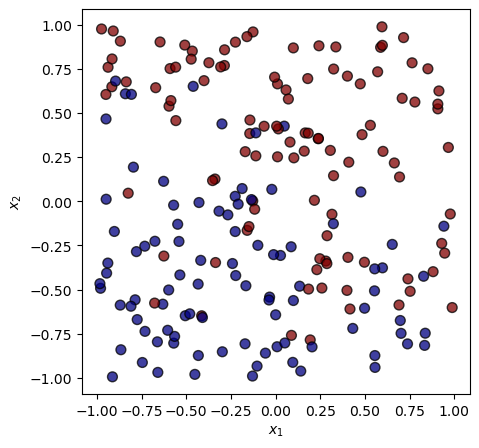

In [31]:
#Some synthetic data
N = 200

#Two random features:
np.random.seed(2)
x1 = np.random.uniform(-1, 1, N)
x2 = np.random.uniform(-1, 1, N)

#Underlying logit:
y_logit = 2*x1 + 4*x2 + .5

#Probability of being in particular class:
p = 1 / (1 + np.exp(-y_logit))

#Randomly determine class based on probabilities:
rand = np.random.uniform(0,1,N)
y = (rand < p).astype(np.float32)



#Plot our data:
fig, ax1 = plt.subplots(1, 1, figsize=(5,5)) #, dpi=300)

ax1.scatter(x1, x2, c=y, s=50, cmap='jet', edgecolor='black', alpha=.75)#, label=['a','b']);

ax1.set_xlabel('$x_1$', fontweight='bold')
ax1.set_ylabel('$x_2$', fontweight='bold');
#ax1.legend()

In [32]:
## Convert to PyTorch tensors:
x1 = torch.tensor(x1, dtype=torch.float32).unsqueeze(dim=1)
x2 = torch.tensor(x2, dtype=torch.float32).unsqueeze(dim=1)

y = torch.tensor(y, dtype=torch.float32).unsqueeze(dim=1)

In [33]:
## Input as matrix tensor:
X = torch.hstack((x1,x2))


In [34]:
X = torch.hstack((x1, x2))

##weights and bias
weights = torch.randn(2, 1, requires_grad=True)
bias = torch.randn(1, requires_grad=True)

##hyperparameters
learning_rate = 0.1
num_epochs = 1000

In [35]:
##loop
for epoch in range(num_epochs):

    logits = X @ weights + bias
    y_pred = torch.sigmoid(logits)

    loss = -torch.mean(y * torch.log(y_pred + 1e-10) + (1 - y) * torch.log(1 - y_pred + 1e-10))

    loss.backward()

    with torch.no_grad():
        weights -= learning_rate * weights.grad
        bias -= learning_rate * bias.grad

        weights.grad.zero_()
        bias.grad.zero_()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 1.0386929512023926
Epoch 100, Loss: 0.5654430985450745
Epoch 200, Loss: 0.4686388671398163
Epoch 300, Loss: 0.43563660979270935
Epoch 400, Loss: 0.4207293391227722
Epoch 500, Loss: 0.41290900111198425
Epoch 600, Loss: 0.40841931104660034
Epoch 700, Loss: 0.4056842029094696
Epoch 800, Loss: 0.4039474129676819
Epoch 900, Loss: 0.402810662984848


In [36]:
print(f'Final weights: {weights.data.numpy().flatten()}')
print(f'Final bias: {bias.item()}')

Final weights: [1.8103033 3.1377733]
Final bias: 0.41744494438171387


### Setup Model

Now, create, as PyTorch tensors, an appropriate weight vector and bias, where initial weights are drawn from a standard normal distribution and the bias is set to $0$. Be sure you set `requires_grad = True` when you construct these tensors.

Write a function that predicts (logistic regression) model output (as class $1$ probability, not a binary), given these parameters and an input data matrix, $X$:

```
def run_model(w, b, X):
    ...
```

Note that `run_model` should apply a sigmoid activation function before returning the output.

In [37]:
def run_model(w, b, X):
    logits = X @ w + b
    probabilities = torch.sigmoid(logits)
    return probabilities

### Run Training Loop

- Create an appropriate PyTorch loss function, as well as a `torch.optim.SGD` optimizer that uses a learning rate of `.005`, has `momentum = 0.95`, and argument `nesterov=True`. Pass the appropriate parameters to your optimizer at initialization.

#### 1. Full-Batch Gradient Descent

- Use a `for` loop to train the model parameters, using the entire data matrix `X` each iteration (i.e., implement full-batch gradient descent), for 2,000 training epochs.

- Plot the evolution of both weights, bias, and the loss as a function of training epoch.

#### 2. (True) Stochastic Gradient Descent

- Reset the model. Now, use a `for` loop to train the model parameters, but use only a single observation each iteration. Run this training loop for 2,000 iterations.

- Again, plot the evolution of the weights, bias, and the loss as a function of training epoch, as in the example below.

- Also, visualize the decision surface along with the training dataset as in the example figure below.

In [38]:
import numpy as np
import torch
import matplotlib.pyplot as plt

##data
N = 200
np.random.seed(2)
x1 = np.random.uniform(-1, 1, N)
x2 = np.random.uniform(-1, 1, N)
y_logit = 2 * x1 + 4 * x2 + 0.5
p = 1 / (1 + np.exp(-y_logit))
rand = np.random.uniform(0, 1, N)
y = (rand < p).astype(np.float32)

## Convert to PyTorch tensors:
x1 = torch.tensor(x1, dtype=torch.float32).unsqueeze(dim=1)
x2 = torch.tensor(x2, dtype=torch.float32).unsqueeze(dim=1)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(dim=1)
X = torch.hstack((x1, x2))

def run_model(weights, bias, x):
    return torch.sigmoid(x @ weights + bias)

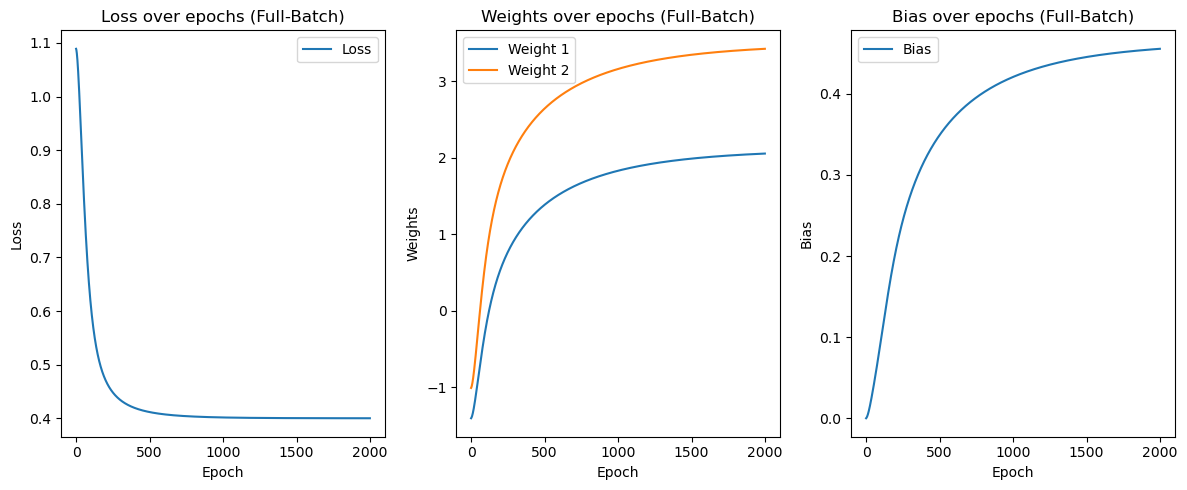

In [39]:

##weights and bias for full-batch gradient descent
weights_fb = torch.randn(2, requires_grad=True)
bias_fb = torch.tensor(0.0, requires_grad=True)

##loss function/optimizer for full-batch
loss_fn = torch.nn.BCELoss()
optimizer_fb = torch.optim.SGD([weights_fb, bias_fb], lr=0.005, momentum=0.95, nesterov=True)

## parameters in training
losses_fb = []
weights_history_fb = []
bias_history_fb = []

##full batch gradient
for epoch in range(2000):
    optimizer_fb.zero_grad()
    probabilities = run_model(weights_fb, bias_fb, X)
    loss = loss_fn(probabilities, y.squeeze())
    loss.backward()
    optimizer_fb.step()

    losses_fb.append(loss.item())
    weights_history_fb.append(weights_fb.detach().clone())
    bias_history_fb.append(bias_fb.detach().clone())
    
##plot evolution of weights/bias/loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot(losses_fb, label='Loss')
plt.title('Loss over epochs (Full-Batch)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
weights_history_fb = torch.stack(weights_history_fb)
plt.plot(weights_history_fb[:, 0].numpy(), label='Weight 1')
plt.plot(weights_history_fb[:, 1].numpy(), label='Weight 2')
plt.title('Weights over epochs (Full-Batch)')
plt.xlabel('Epoch')
plt.ylabel('Weights')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(bias_history_fb, label='Bias')
plt.title('Bias over epochs (Full-Batch)')
plt.xlabel('Epoch')
plt.ylabel('Bias')
plt.legend()

plt.tight_layout()
plt.show()


In [40]:
##reset parameters for SGD
weights_sgd = torch.randn(2, requires_grad=True)
bias_sgd = torch.tensor(0.0, requires_grad=True)

##optimizer for SGD
optimizer_sgd = torch.optim.SGD([weights_sgd, bias_sgd], lr=0.005, momentum=0.95, nesterov=True)

##parameters in training
losses_sgd = []
weights_history_sgd = []
bias_history_sgd = []

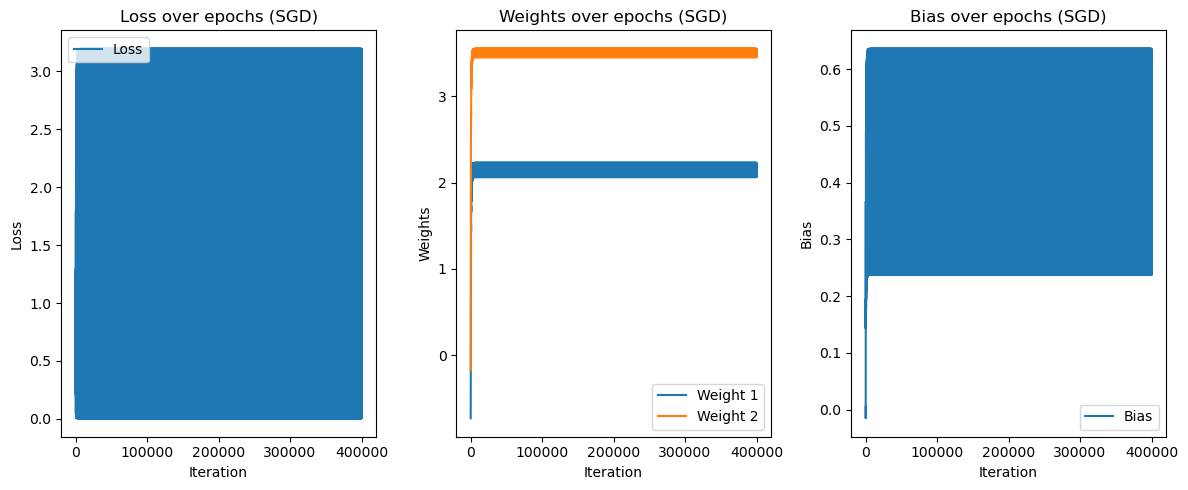

In [41]:
##SGD
for epoch in range(2000):
    for i in range(N):
        optimizer_sgd.zero_grad()
        probabilities = run_model(weights_sgd, bias_sgd, X[i:i+1])
        loss = loss_fn(probabilities.view(-1), y[i:i+1].view(-1))
        loss.backward()
        optimizer_sgd.step()

        losses_sgd.append(loss.item())
        weights_history_sgd.append(weights_sgd.detach().clone())
        bias_history_sgd.append(bias_sgd.detach().clone())
        
##plot evolution of weights/bias/loss for SGD
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot(losses_sgd, label='Loss')
plt.title('Loss over epochs (SGD)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
weights_history_sgd = torch.stack(weights_history_sgd)
plt.plot(weights_history_sgd[:, 0].numpy(), label='Weight 1')
plt.plot(weights_history_sgd[:, 1].numpy(), label='Weight 2')
plt.title('Weights over epochs (SGD)')
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(bias_history_sgd, label='Bias')
plt.title('Bias over epochs (SGD)')
plt.xlabel('Iteration')
plt.ylabel('Bias')
plt.legend()

plt.tight_layout()
plt.show()